In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd 

In [ ]:
dataset = pd.read_csv('data.csv')
dataset.head()

,No,Langitude,Latitude,Kasus LP,Mati Lp
0,1,285.624,360.177,19,2
1,2,316.482,416.029,10,2
2,3,372.465,477.044,21,4
3,4,356.000,500.922,5,5
4,5,345.667,607.111,4,5


In [ ]:
X = dataset.iloc[:,[1,2,3]].values

In [ ]:
print(X)

[[285.624 360.177  19.   ]
 [316.482 416.029  10.   ]
 [372.465 477.044  21.   ]
 [356.    500.922   5.   ]
 [345.667 607.111   4.   ]
 [411.501 744.456   8.   ]
 [273.085 853.165  30.   ]
 [175.463 796.457  31.   ]
 [264.223 746.21   13.   ]
 [268.767 648.833  18.   ]
 [231.833 699.254  15.   ]
 [214.637 606.932   9.   ]
 [272.84  539.605  13.   ]
 [242.286 467.579  16.   ]
 [207.03  433.947   1.   ]
 [212.336 388.706   4.   ]
 [ 37.458 440.903   1.   ]
 [137.512 486.03   11.   ]
 [193.18  554.315   6.   ]
 [ 68.07  619.623   9.   ]
 [102.402 657.313  11.   ]
 [ 96.241 753.623   1.   ]
 [159.087 781.666  20.   ]
 [136.265 819.849  34.   ]
 [166.729 896.318  11.   ]
 [ 75.827 938.022   2.   ]
 [ 54.101 814.732   4.   ]
 [ 69.456 761.095   4.   ]
 [193.    690.533  49.   ]
 [164.893 718.456  38.   ]
 [167.76  704.442  29.   ]]


In [ ]:
!pip install kmeans
#import kmeans
from sklearn.cluster import KMeans

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for kmeans: filename=kmeans-1.0.2-cp38-cp38-linux_x86_64.whl size=11791 sha256=56d32fe100d08ca55dd492df6ede730593a2d4971bd575404bf5573500df4d6b
  Stored in directory: /root/.cache/pip/wheels/f7/e8/10/43428d0e74682ef832025ebc394d327476d905098d5f2984d4
Successfully built kmeans


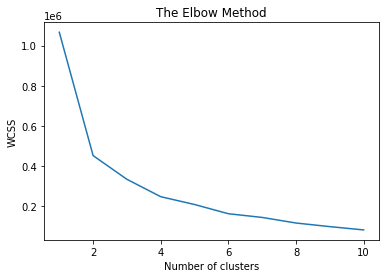

In [ ]:
wcss = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)

  kmeans.fit(X)  
  wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [ ]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_means = kmeans.fit_predict(X)

In [ ]:
kmeans

KMeans(n_clusters=4, random_state=42)

In [ ]:
y_means

array([0, 0, 0, 0, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1], dtype=int32)

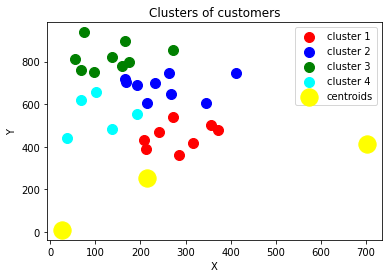

In [ ]:
plt.scatter(X[y_means == 0, 0], X[y_means == 0, 1], s= 100, c='red', label= 'cluster 1' )
plt.scatter(X[y_means == 1, 0], X[y_means == 1, 1], s= 100, c='blue', label= 'cluster 2' )
plt.scatter(X[y_means == 2, 0], X[y_means == 2, 1], s= 100, c='green', label= 'cluster 3' )
plt.scatter(X[y_means == 3, 0], X[y_means == 3, 1], s= 100, c='cyan', label= 'cluster 4' )
plt.scatter(kmeans.cluster_centers_[0], kmeans.cluster_centers_[1], s=300, c='yellow', label= 'centroids')
plt.title('Clusters of customers')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
